In [1]:
import pinot
import pandas as pd

Using backend: pytorch
/Users/wangy1/anaconda3/envs/pinot/lib/python3.7/site-packages/dgl/base.py:45: DGLWarning: Detected an old version of PyTorch. Suggest using torch>=1.5.0 for the best experience.
  return warnings.warn(message, category=category, stacklevel=1)


In [9]:
df = pd.read_csv("/Users/wangy1/Documents/GitHub/pinot/pinot/data/moonshot_with_date.csv")
moonshot_smiles = df["SMILES"]
df_series = pd.read_csv("activity_data.csv")
df = df.merge(df_series, how="left")

In [10]:
from rdkit import Chem
mols = [Chem.MolFromSmiles(smiles) for smiles in moonshot_smiles]

In [11]:
from rdkit.Chem import MACCSkeys
import numpy as np
fps = np.array([MACCSkeys.GenMACCSKeys(x) for x in mols])

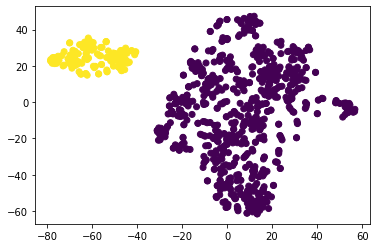

In [22]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2).fit(fps)
clustering.labels_

from sklearn.manifold import TSNE
tsne = TSNE(
    2, 
    perplexity=20,
    # metric=lambda x, y: 1 - (np.sum(x==y) / x.shape[0]),
)
x = tsne.fit_transform(fps)
from matplotlib import pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=clustering.labels_)

In [23]:
def stacked_area_plot(traj, classes, title="BO"):
    record = {_class: [0] for _class in classes}
    for x in traj:
        for _class in record:
            if _class == x:
                record[_class].append(
                    record[_class][-1] + 1
                )
            else:
                record[_class].append(
                    record[_class][-1]
                )
    
    x = np.concatenate([np.array([0]), np.arange(1, len(traj)+1)])
    
    ys = [np.zeros_like(x)]
    
    for _class in classes:
        
        
        ys.append(
            np.array(record[_class]) + ys[-1]
        )
    
    
    for idx in range(len(ys)-1):
        plt.fill_between(
            x,
            ys[idx],
            ys[idx+1],
            label=classes[idx]
        )
    plt.legend(loc="upper left")
    plt.xlabel("Candidates acquired")
    plt.title(title)
    

In [25]:
def stacked_area_plot_sliding(traj, classes, title="BO", window=10):
    record = {_class: [0] for _class in classes}
    for x in traj:
        for _class in record:
            if _class == x:
                record[_class].append(
                    1.0
                )
            else:
                record[_class].append(
                    0.0
                )
    
    record = {_class: np.convolve(np.array(x), np.ones(window)/window, "valid") for _class, x in record.items()}
    
    ys = [np.zeros_like(next(iter(record.values())))]
    
    for _class in classes:
        print(record[_class].shape)
        
        ys.append(
            record[_class] + ys[-1]
        )
    
    
    for idx in range(len(ys)-1):
        plt.fill_between(
            np.arange(ys[-1].shape[0]),
            ys[idx],
            ys[idx+1],
            label=classes[idx]
        )
    plt.legend(loc="lower left")
    plt.xlabel("Candidates acquired")
    plt.title(title)
    
    






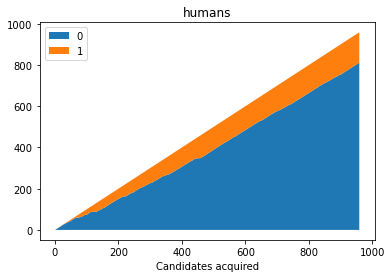

In [24]:
stacked_area_plot(clustering.labels_, list(set(clustering.labels_)), "humans")

(861,)
(861,)


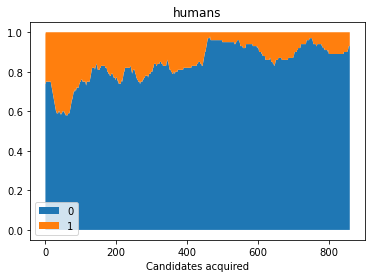

In [27]:
stacked_area_plot_sliding(clustering.labels_, list(set(clustering.labels_)), "humans", 100)

In [29]:
traj0 = [302, 293, 2, 115, 383, 317, 132, 194, 471, 463, 498, 314, 455, 113, 400, 183, 29, 61, 62, 190, 185, 473, 494, 238, 567, 564, 571, 569, 565, 468, 591, 519, 555, 142, 353, 343, 191, 255, 479, 244, 411, 369, 188, 49, 229, 210, 201, 579, 223, 315, 213, 469, 251, 508, 513, 505, 268, 12, 250, 333, 527, 286, 447, 167, 168, 587, 163, 472, 502, 166, 367, 257, 50, 493, 466, 297, 204, 477, 470, 475, 216]

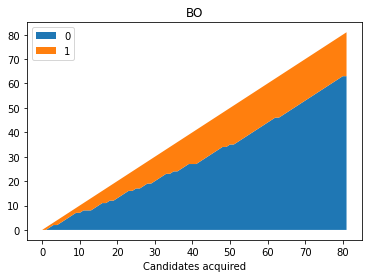

In [31]:
stacked_area_plot([clustering.labels_[x] for x in traj0], list(set(clustering.labels_)), "BO")

(73,)
(73,)


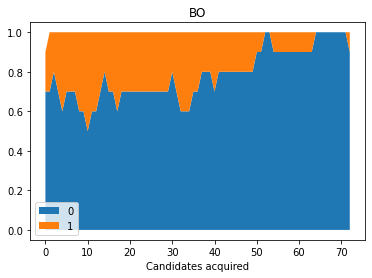

In [32]:
stacked_area_plot_sliding([clustering.labels_[x] for x in traj0], list(set(clustering.labels_)), "BO")